<center>
    
# Boston Housing Price

</center>

In [1]:
# basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cf.go_offline()
init_notebook_mode(connected = True)
sns.set_style('whitegrid')
%matplotlib inline

# scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# stats model
import statsmodels.api as sm

In [2]:
# dataset
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of Houses')

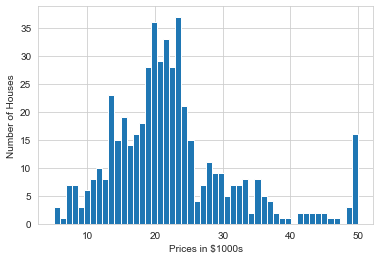

In [3]:
# plotting the number of houses with respect of prices
plt.hist(boston.target, bins = 50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

Text(0, 0.5, 'Price in $1000s')

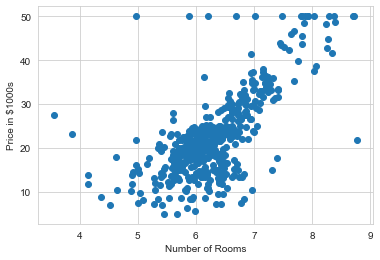

In [4]:
# scatterplot between number of rooms and housing price
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel('Number of Rooms')
plt.ylabel('Price in $1000s')

In [5]:
#transforming the data into pandas dataframe
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# adding price from boston.target to the dataframe
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# dataset info
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [8]:
# dataset description
boston_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
# checking missing value
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

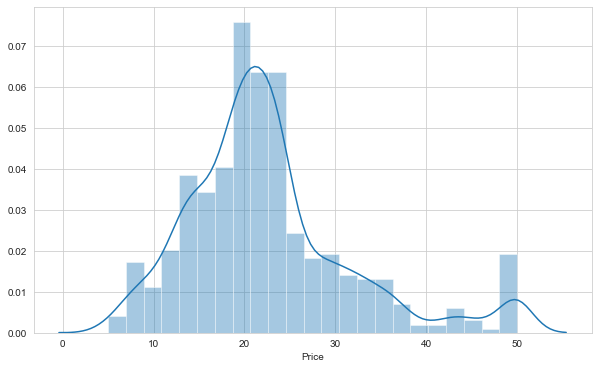

In [10]:
# distplot of price
plt.figure(figsize = (10, 6))
sns.distplot(boston_df['Price'])

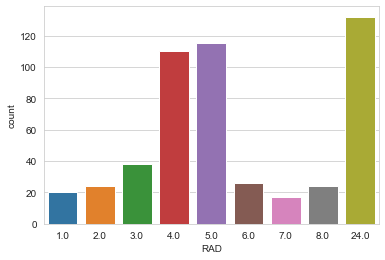

In [11]:
# index of accessibility to radial highways countplot
sns.countplot(boston_df['RAD'])

In [12]:
# correlation matrix
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


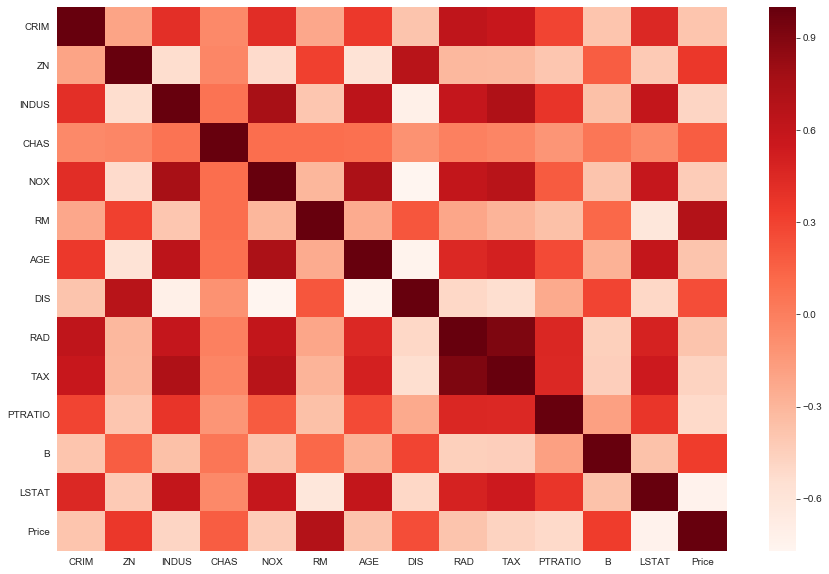

In [13]:
# correlation heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(boston_df.corr(), cmap = 'Reds')

In [14]:
# correlation with price
boston_df.corr()['Price'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
Price      1.000000
Name: Price, dtype: float64

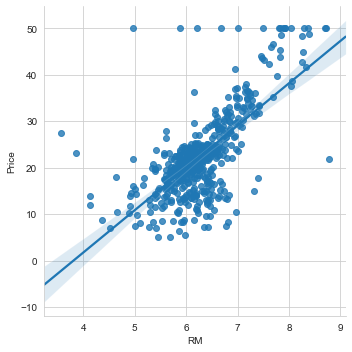

In [15]:
# giving trendline to scatterplot
sns.lmplot('RM', 'Price', data = boston_df)

#### Equation of Linear Regression
Equation: 
$$y = mx + b$$
<br>
where: 
<br>
- m = slope
- x = explanatory variable
- b = intercept

which can be rewritten as:
$$ y = Ap $$


where:
$$ A = \begin{bmatrix} x & 1 \end{bmatrix}$$

$$ p = \begin{bmatrix} m \\ b \end{bmatrix}$$

In [16]:
# setting up x as median room values
x = boston_df.RM

# using vstack method to make x two-dimensional
x = np.vstack(boston_df.RM)

# setting up y as the target price of the house
y = boston_df.Price

In [17]:
# making the x array to become [x 1]
x = np.array([[value, float(1)] for value in x]) 
x = x.astype(np.float64)
x

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [18]:
# using linear algebra with least square method
least_square = np.linalg.lstsq(x, y)
m, b = least_square[0]

D:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



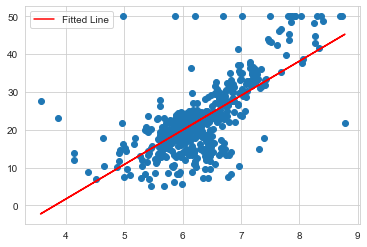

In [19]:
# plotting the linear regression graph
plt.plot(boston_df.RM, boston_df.Price, 'o')
x = boston_df.RM
plt.plot(x, m*x + b, color = 'r', label = 'Fitted Line')
plt.legend()

In [20]:
# getting error/noise 
error_total = least_square[1]

rmse = np.sqrt(error_total/len(x))
print('The Root Mean Square Error is %.2f' %rmse)

The Root Mean Square Error is 6.60


<div style="text-align: justify">  
The price of the house will not vary more than two times RMSE value 95% of the time. Thus, it can reasonably be expected a house price to be within $13,200 of our line fit 95% of the time.
</div>

In [21]:
# activating Linear Regression method
linear_reg = LinearRegression()

In [22]:
# setting up the explanatory variables and dependent variable
x_multi = boston_df.drop('Price', 1)
y_target = boston_df.Price

In [23]:
# fitting the line
linear_reg.fit(x_multi, y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# intercept and number of coefficients (parameters)
print(
    'The estimated intercept coefficient is %.2f\nThe number of coefficents used is %d' 
    %(linear_reg.intercept_, len(linear_reg.coef_))
)

The estimated intercept coefficient is 36.46
The number of coefficents used is 13


In [25]:
# estimated coefficients for each parameter
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(linear_reg.coef_)
coeff_df.dropna()

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [26]:
# dividing the data into training dataset and testing dataset
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, boston_df.Price)

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(379, 1) (127, 1) (379, 1) (127, 1)


In [27]:
# fitting the model with Linear Regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# predicting the data
pred_train = linreg.predict(x_train)
pred_test = linreg.predict(x_test)

# MAE, MSE, RMSE for training data
print('Mean Absolute Error of training data: %.2f' %metrics.mean_absolute_error(y_train, pred_train))  
print('Mean Squared Error of training data: %.2f' %np.mean((y_train - pred_train)**2))
print('Root Mean Squared Error of training data: %.2f\n\n' %np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

# MAE, MSE, RMSE for test data 
print('Mean Absolute Error of test data: %.2f' %metrics.mean_absolute_error(y_test, pred_test)) 
print('Mean Squared Error of test data: %.2f' %np.mean((y_test - pred_test) ** 2))
print('Root Mean Squared Error of test data: %.2f' %np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Mean Absolute Error of training data: 4.34
Mean Squared Error of training data: 41.01
Root Mean Squared Error of training data: 6.40


Mean Absolute Error of test data: 4.76
Mean Squared Error of test data: 51.53
Root Mean Squared Error of test data: 7.18


In [29]:
# comparison between the actual values and predicted values
value_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred_test.flatten()})
value_df_first_ten = value_df.head(10)
value_df_first_ten

,Actual,Predicted
0,19.4,20.375080
1,19.1,19.073927
2,20.3,20.202199
3,18.9,20.247694
4,22.5,20.302288
5,24.3,21.148492
6,23.9,29.046399
7,19.4,22.249468
8,16.8,18.373306
9,8.7,21.548847


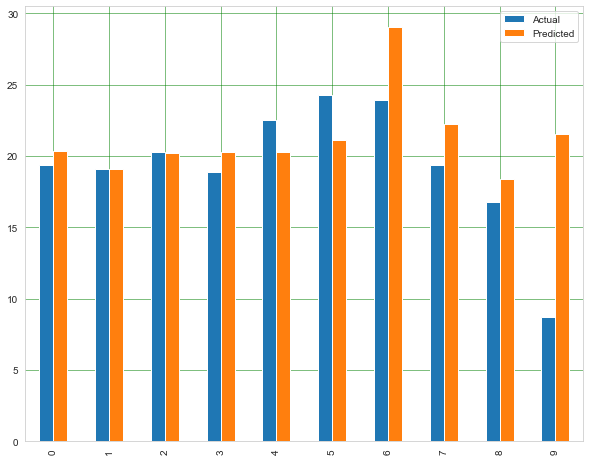

In [30]:
# plotting comparison
value_df_first_ten.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0.5, 1.0, 'Residual Plot')

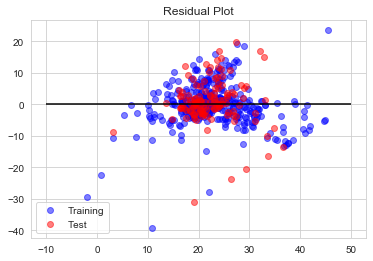

In [31]:
# plotting residuals
train = plt.scatter(pred_train, (pred_train - y_train), color = 'b', alpha = 0.5)
test = plt.scatter(pred_test, (pred_test - y_test), color = 'r', alpha = 0.5)

plt.hlines(y = 0, xmin = -10, xmax = 50)
plt.legend((train, test), ('Training', 'Test'), loc = 'lower left')
plt.title('Residual Plot')

In [32]:
# stats model
linreg_model = sm.OLS(y_target, x_multi).fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Sun, 04 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:37:34   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

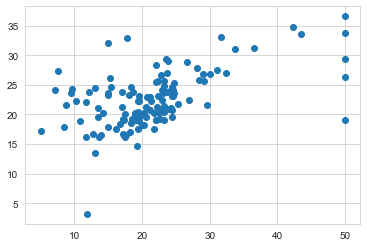

In [33]:
# scatterplot between prediction and the actual data
plt.scatter(y_test, pred_test)

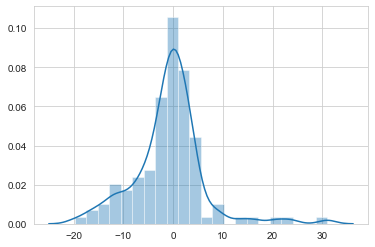

In [34]:
# residuals distribution plot
sns.distplot((y_test - pred_test))